# Problem Statement 
Parkinson's disease is a progressive nervous system disorder that affects movement leading to shaking, stiffness, and difficulty with walking, balance, and coordination. Parkinson's symptoms usually being gradually and get worse over time. 

## Workflow 
1. Parkinson's Data 
2. Data pre-processing 
3. Train Test Split 
4. Traing Data - Support Vector Classifier 
5. Evaluating the Model 

- New Data - Trained Support Vector Machine Classifier - Parkinson's or Healthy(Prediction)

In [28]:
# data analysis 
import pandas as pd 
import numpy as np 
# visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
# set options 
sns.set_style('whitegrid')
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
%matplotlib inline 
# machine learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# import data 
df = pd.read_csv('../data/diabetes.csv')
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# check shape of data 
df.shape

(768, 9)

In [4]:
# dtypes 
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
# check missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# summary stats 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [7]:
# transpose summary stats 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845,3.370,0.000,1.000,3.000,6.000,17.00
Glucose,768.0,120.895,31.973,0.000,99.000,117.000,140.250,199.00
BloodPressure,768.0,69.105,19.356,0.000,62.000,72.000,80.000,122.00
SkinThickness,768.0,20.536,15.952,0.000,0.000,23.000,32.000,99.00
Insulin,768.0,79.799,115.244,0.000,0.000,30.500,127.250,846.00
BMI,768.0,31.993,7.884,0.000,27.300,32.000,36.600,67.10
DiabetesPedigreeFunction,768.0,0.472,0.331,0.078,0.244,0.372,0.626,2.42
Age,768.0,33.241,11.760,21.000,24.000,29.000,41.000,81.00
Outcome,768.0,0.349,0.477,0.000,0.000,0.000,1.000,1.00


In [9]:
# class distribution 
df['Outcome'].value_counts() 

0    500
1    268
Name: Outcome, dtype: int64

__Comment__
- 1 Diabetes positive 
- 0 Diabetes negative 

In [10]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298,109.980,68.184,19.664,68.792,30.304,0.43,31.190
1,4.866,141.257,70.825,22.164,100.336,35.143,0.55,37.067


In [11]:
# correlation: Pearson’s by default 
df.corr(method='pearson')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


In [12]:
# skew 
df.skew(numeric_only=True)

Pregnancies                 0.902
Glucose                     0.174
BloodPressure              -1.844
SkinThickness               0.109
Insulin                     2.272
BMI                        -0.429
DiabetesPedigreeFunction    1.920
Age                         1.130
Outcome                     0.635
dtype: float64

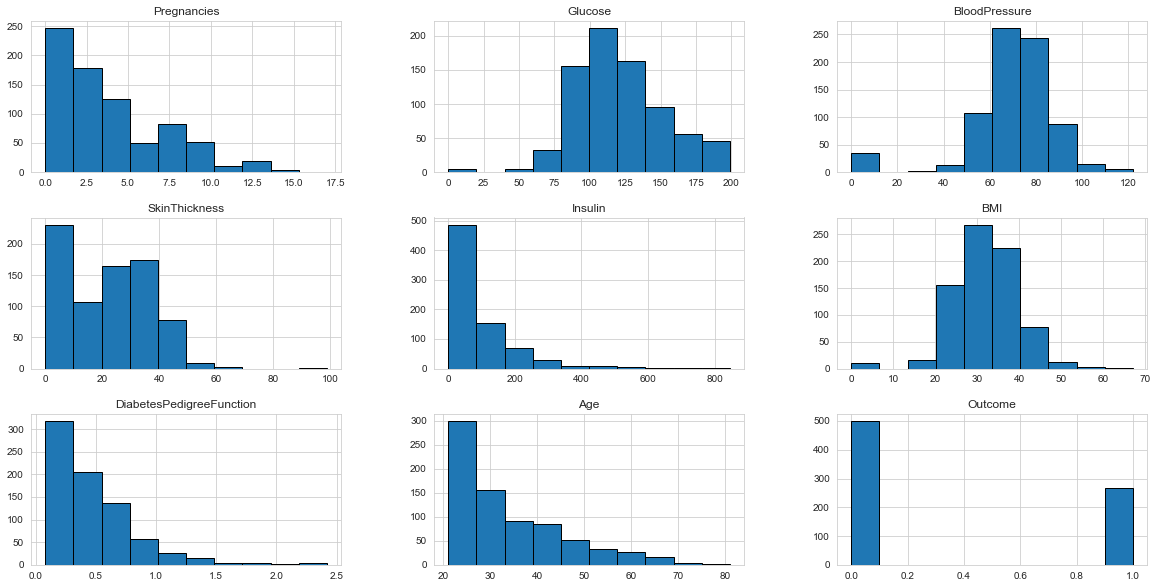

In [14]:
df.hist(figsize=(20,10), edgecolor='black')
plt.show() 

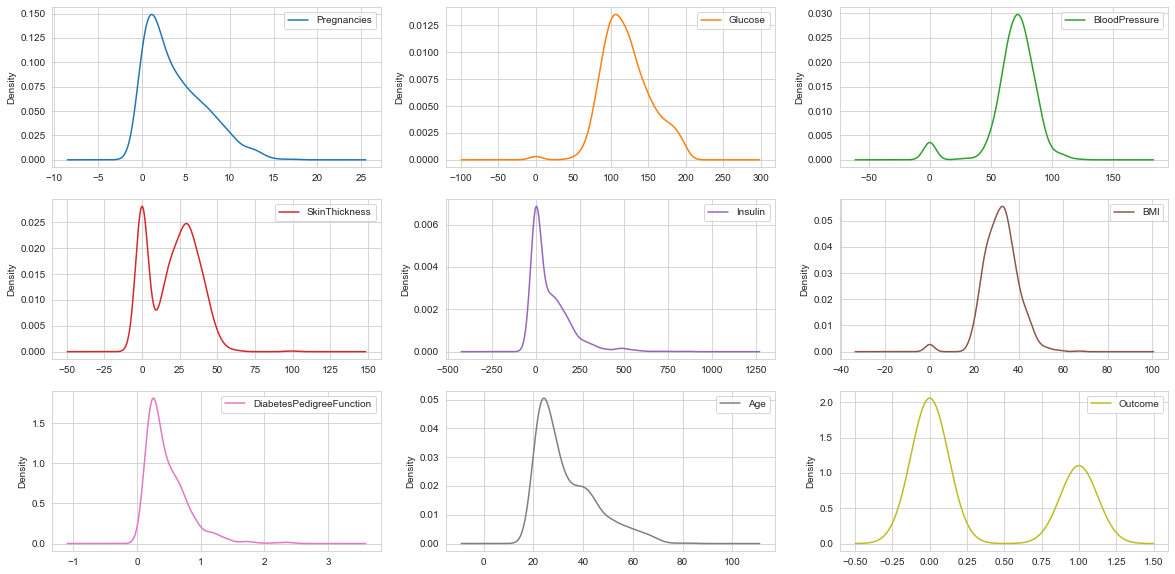

In [15]:
df.plot(kind='density', subplots=True, sharex=False, figsize=(20,10), layout=(3,3))
plt.show() 

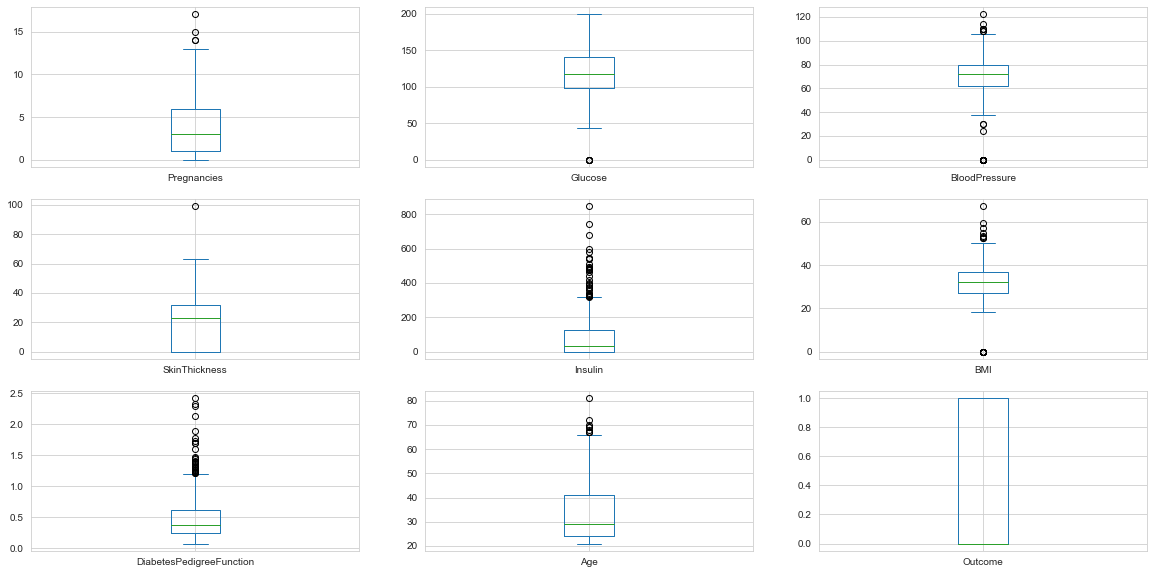

In [16]:
df.plot(kind='box', subplots=True, sharex=False, figsize=(20,10), layout=(3,3))
plt.show() 

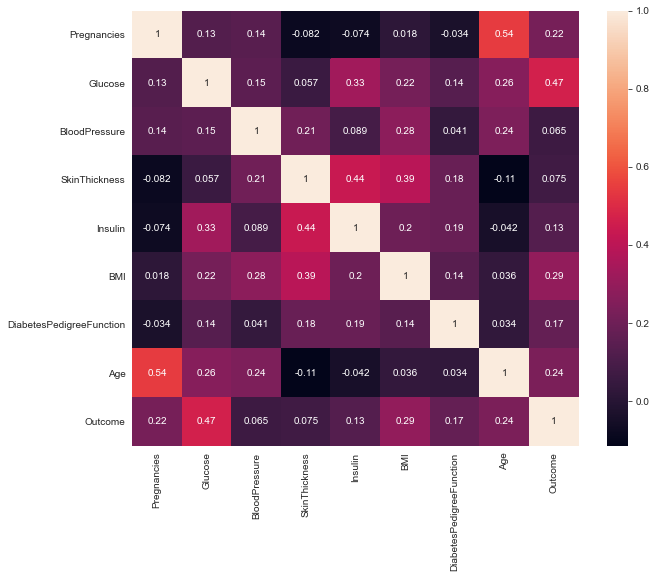

In [18]:
plt.figure(figsize=(10,8))
corr = df.corr() 
sns.heatmap(corr, annot=True)
plt.show()

In [19]:
X = df.drop(columns=['Outcome'], axis=1)
y = df['Outcome']

In [20]:
X.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [21]:
y.head() 

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((614, 8), (154, 8), (614,), (154,))

In [24]:
# Standardization
scaler = StandardScaler() 
scaler.fit(X_train)

StandardScaler()

In [25]:
X_train = scaler.transform(X_train)


In [26]:
X_test = scaler.transform(X_test)

In [27]:
X_train

array([[-0.85811767,  0.06488386,  0.25332145, ..., -0.51313743,
        -1.10316947, -0.27704152],
       [-0.85811767, -0.84697246,  0.66358026, ...,  0.4081093 ,
        -0.71238555,  0.84376203],
       [-1.15412006, -0.87841578,  0.04819205, ...,  1.49569224,
        -0.37742791, -1.05298243],
       ...,
       [ 0.02988949,  0.09632718,  0.04819205, ..., -0.3723914 ,
         1.96433735,  1.01619334],
       [-0.2661129 , -0.18666271,  0.25332145, ..., -0.70506383,
        -1.08260189, -0.79433546],
       [ 0.02988949, -0.37532264, -0.15693736, ...,  0.0114614 ,
        -0.01308802, -0.36325717]])

In [29]:
model = LogisticRegression()
# training model with training data 
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
# evaluation 
X_train_pred = model.predict(X_train)
X_train_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
# evaluation 
training_accuracy_score = accuracy_score(y_train, X_train_pred)
training_accuracy_score

0.7801302931596091

In [32]:
X_test_pred = model.predict(X_test)
test_accuracy_score = accuracy_score(y_test, X_test_pred)
test_accuracy_score

0.7662337662337663

In [102]:
# Predictive System 
input_data = (119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)
input_data_array = np.asarray(input_data)

input_data_reshaped = input_data_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
prediction = model.predict(std_data)

if prediction[0] == 0:
    print("The Person does not have Perkinson's")
else: 
    print("The Person has Perkinson's")

print(prediction)

The Person has Perkinson's
[1]
